# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set

We will examine some data representing the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car.
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [ ]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline

In [ ]:
# Uncomment if using Google Colab or Kaggle Kernels.
# Imports the data using gdown.
!gdown https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp

Downloading...
From: https://drive.google.com/uc?id=1PtY3ne37XA8Jk_cAf0Cd7JSRvEU8KDbp
To: /content/car_data.csv
100% 15.9k/15.9k [00:00<00:00, 21.3MB/s]



## Part 1
### Question 1.1:


Read the `car_data.csv` file as a `pandas.DataFrame` and show its descriptive statistics.  Investigate the relationship between the cars' weight and their mpg by plotting a scatter plot of the `weight` (x axis) and `mpg` columns (y axis). Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. Remember to label your axes.

In [ ]:
# YOUR CODE HERE

In [ ]:
# Read in the data with pandas
car_data = pd.read_csv('car_data.csv')

# Descriptive stats
car_data.describe()


,MPG,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


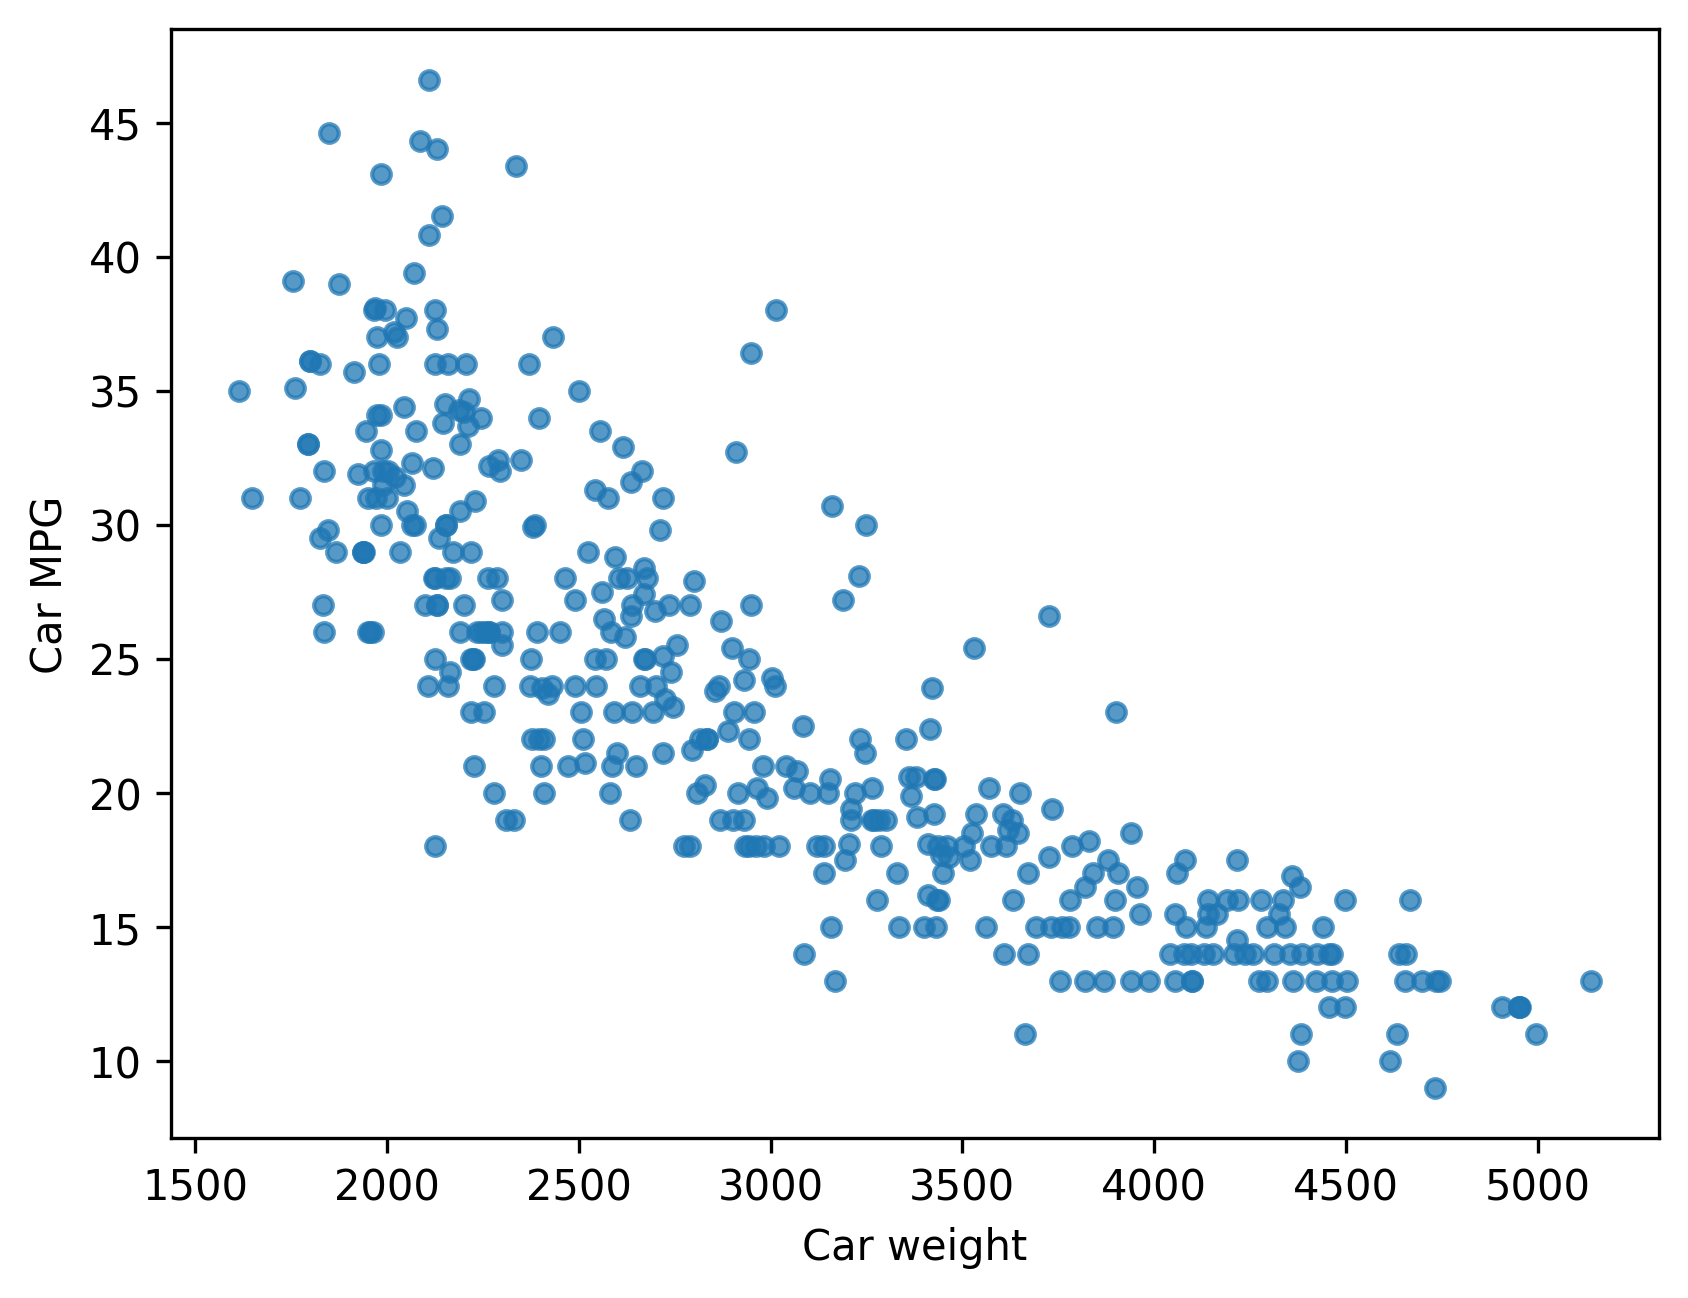

In [ ]:
# Create the axis where the plotting will happen
fig, ax = plt.subplots(dpi=300)

# Do the plotting
car_data.plot.scatter(x='weight', y='MPG', alpha=0.75, ax=ax)

# Adjust the labels
ax.set_xlabel('Car weight')
ax.set_ylabel('Car MPG')

# Display the plot
plt.show()


**Written answer: What do you see here? Discuss your findings**

A: There is a clear non-linear trend. As the weight of the car increases the MPG decreases. There is more dispersion at low-weight cars versus high-weight cars.

### Question 1.2:

Recall that the linear model, we obtain predictions by computing

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$.

What is the dimensionality of the numpy-array that you get back?

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [ ]:
def linearModelPredict(b,X):
    # Numpy does matrix multiplication in a few ways.
    # The dot or @ operator are most common.
    # b should always have the same dimensionality as X has columns.
    yp = np.dot(X,b)

    return yp

# Test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
print(f"X@b is {str(linearModelPredict(b,X))}")


X@b is [ 0.1 -0.2  0.7]


In [ ]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))


Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


### Question 1.3:

Write a function `linearModelMSE` which computes and returns the mean squared error parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes. Recall that:

$$
MSE(y_i, \hat{y_i}) = \frac{1}{|I|} \sum_i (y_i - \hat{y_i})^2
$$
$$
\Delta MSE(y, \hat{y}) = -\frac{2}{|I|} \left[(y-\hat{y}) \cdot X\right]
$$

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.


In [ ]:
# Your code here.

In [ ]:
def linearModelMSE(b,X,y):
    # The loss is really a function of b.  The b changes, the X and y stay fixed.
    # Make predictions
    predY = linearModelPredict(b,X)

    # Get the number of cases
    cases = X.shape[0]

    # Compute residuals.  This is an array.  The dimension of res will depend on if
    # b is 1d or 2d.  If b is 2d, predY will be 2d, and so res will be 2d due to something
    # called "array broadcasting".
    res = y-predY

    # Simply sum up the squared residuals.  This is the value of our loss.
    residual_sum_of_squares = np.mean(res**2)

    # Because res is a vector, we can take the product of res with X.
    # Since X is two dimensional because it is a design matrix, this results in a
    # 2d array.  The gradient has two elements because there are two parameters.
    gradient=-2*np.dot(res,X) / cases

    return (residual_sum_of_squares, gradient)


In [ ]:
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
rss, grad =linearModelMSE(b,X,y)

print("MSE is", rss)
print("gradient:\n", grad)

MSE is 0.6866666666666666
gradient:
 [-1.2        -1.33333333]


**Written answer**: To minimize the loss, do you need increase or decrease the value of the parameters?

A: The gradient is negative for both parameters, therefore both need to be increased to minimize the cost.

### Question 1.4:

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2.

Test the function with the values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```

Report the best parameters and the fitted $R^2$.


In [ ]:
def linearModelFit(X, y, lossfcn = linearModelMSE):
    # Because we know b has to have the same dimension as X's columns,
    # We can use the number of columns to determine the size of betas
    # In this case, we use a 2d array
    nrows,ncols = X.shape
    betas=np.zeros((ncols,1)).reshape(-1)

    # Get the number of cases
    cases = X.shape[0]

    # Optimize the loss
    RES = so.minimize(lossfcn, betas, args=(X,y), jac=True, options={'disp': True})

    # Obtain estimates from the optimizer
    estimated_betas=RES.x

    # Compute goodness of fit.
    res = y-np.mean(y)
    TSS = sum(res**2)
    MSE, deriv = linearModelMSE(estimated_betas,X,y)
    R2 = 1 - cases * MSE/TSS

    return (estimated_betas,R2)


X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
beta , R2 = linearModelFit(X, y)

print("Betas are", beta)
print("R2:\n", R2)

Optimization terminated successfully.
         Current function value: 0.186667
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Betas are [0.59999731 0.600001  ]
R2:
 0.7499999999904616


### Question 1.5:

Use the above functions to fit your model to the car data. Use the MPG as the target (y) variable and the weight as the independent (x). Then use your model and the fitted parameters to make predictions along a grid of equally spaced weights within the original range of the weight variable.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with 100 equally space weights (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the `annotate` function in matplotlib.


Optimization terminated successfully.
         Current function value: 18.676617
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6


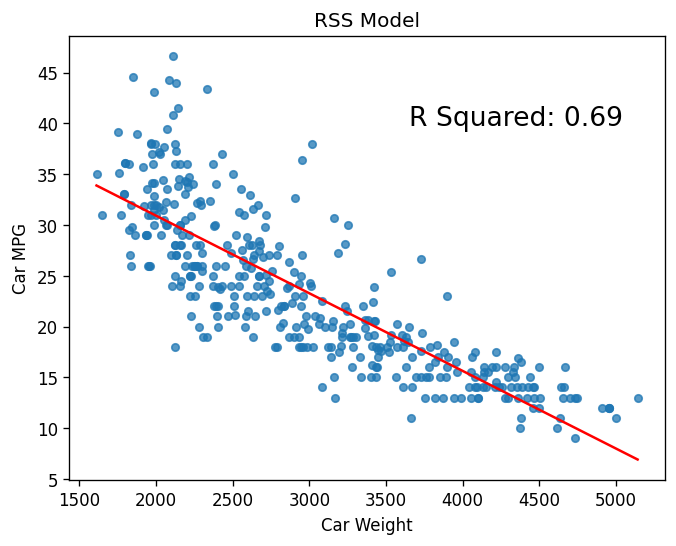

In [ ]:
# Fit the data
y = car_data.MPG.values
weight = car_data.weight.values
N = weight.size
X = np.c_[np.ones(N), weight]
betas, R2 = linearModelFit(X,y)

# Create new data
weight_grid = np.linspace(weight.min(), weight.max(), 100)
# Turn it into a design matrix
Xn = np.c_[np.ones(weight_grid.size), weight_grid]

# Compute predictions with the new data and estimated coefficients
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
car_data.plot.scatter(x='weight', y='MPG', alpha=0.75, ax=ax)
ax.set_xlabel('Car Weight')
ax.set_ylabel('Car MPG')

ax.plot(weight_grid, yn, color = 'red')
ax.annotate(f'R Squared: {R2:.2f}',
            xy=(0.75, 0.8),
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('RSS Model')

plt.show()

# students are required to calculate R2 manually here

### Question 1.6:

Now use sklearn's `linear_model` to fit the model with all the available data. Plot the data and add a line for the predicted values as you did in the previous question. Also report the $R^2$ value for the fit.

**Written answer: How much do you gain by having more variables?**

In [ ]:
# Here, I am showing my models a dataframe.
y = car_data.MPG.values
X = car_data.iloc[:, 1:6]
ols_fit = linear_model.LinearRegression().fit(X, y)
R2_ols = ols_fit.score(X, y)

print(f'MSE RSquared: {R2_ols:.2f}')

MSE RSquared: 0.71


(100, 5)


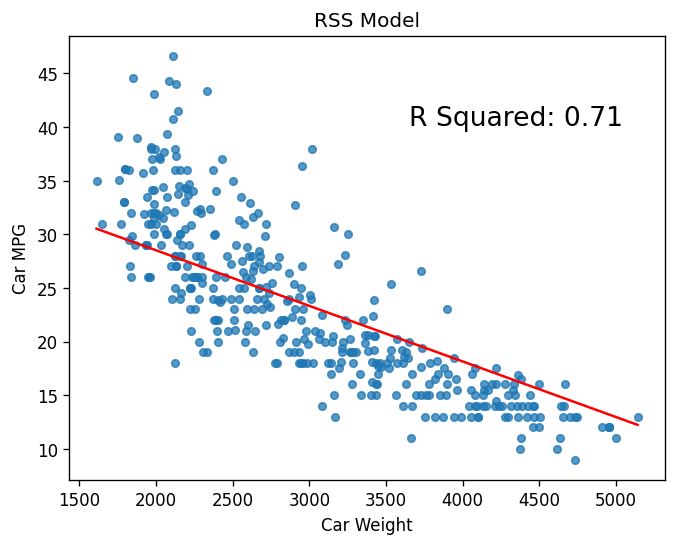

In [ ]:
# Compute predictions with the new data and estimated coefficients
y_ols = ols_fit.predict(X)

fig, ax = plt.subplots(dpi = 120)
car_data.plot.scatter(x='weight', y='MPG', alpha=0.75, ax=ax)
ax.set_xlabel('Car Weight')
ax.set_ylabel('Car MPG')

# Create a matrix X_mean so that it has the mean of all variables in matrix X and weight_grid
columns = ['cylinders', 'displacement', 'horsepower', 	'weight', 'acceleration']
X_mean = np.c_[np.full(weight_grid.size, X['cylinders'].mean()),
               np.full(weight_grid.size, X['displacement'].mean()),
               np.full(weight_grid.size, X['horsepower'].mean()),
               weight_grid,
               np.full(weight_grid.size, X['acceleration'].mean())]

X_mean = pd.DataFrame(X_mean, columns=columns)

# Compute predictions with the new data and estimated coefficients
yn =  ols_fit.predict(X_mean)
ax.plot(weight_grid, yn, color = 'red')
ax.annotate(f'R Squared: {R2_ols:.2f}',
            xy=(0.75, 0.8),
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('RSS Model')

plt.show()

**Written answer: The other variables contribute just a little, with the $R^2$ increasing to 0.71**.

## Part 2: LAD Regression

### Question 2.1:

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss $LAD(y_i, \hat{y_i})$.

$$
LAD(y_i, \hat{y_i}) = \frac{1}{|I|}\sum_i |y_i - \hat{y_i}|
$$

where $y_i$ is the true label of sample $i \in I$, $\hat{y_i}$ is the prediction, $I$ is the sample set, and $|I|$ is the number of cases in the sample. The gradient of the function is:

$$
\nabla LAD(y, \hat{y}) = - \frac{ sign(y_i - \hat{y_i}) \cdot X}{|I|}
$$

with `sign` the sign function. Note this function is undefined at 0.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss, following the same structured as the previous part.

Test the function with the values

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

Report the loss and the gradient.

In [ ]:
def linearModelLossLAD(b,X,y):
    # Same concept as before, different loss
    predY = linearModelPredict(b,X)
    res = y-predY
    sres = np.sign(res);
    mean_abs_dev = np.mean(abs(res))
    cases = X.shape[0]

    # Note the gradients are computed using the sign of the residuals
    grad =- (np.dot(sres,X)) / cases

    return (mean_abs_dev,grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
lad, grad =linearModelLossLAD(b,X,y)

print("LAD is", lad)
print("gradient:\n", grad)

LAD is 0.6666666666666666
gradient:
 [-0.33333333 -0.33333333]


### Question 2.2:


Use the above functions to fit your LAD model using the weight variable as input, to predict the mpg. Use your model to make predictions along a grid of 100 equally spaced car weights.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



/usr/local/lib/python3.11/dist-packages/scipy/optimize/_minimize.py:708: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: 3.247719
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 95
[ 4.41061632e+01 -7.10610392e-03]


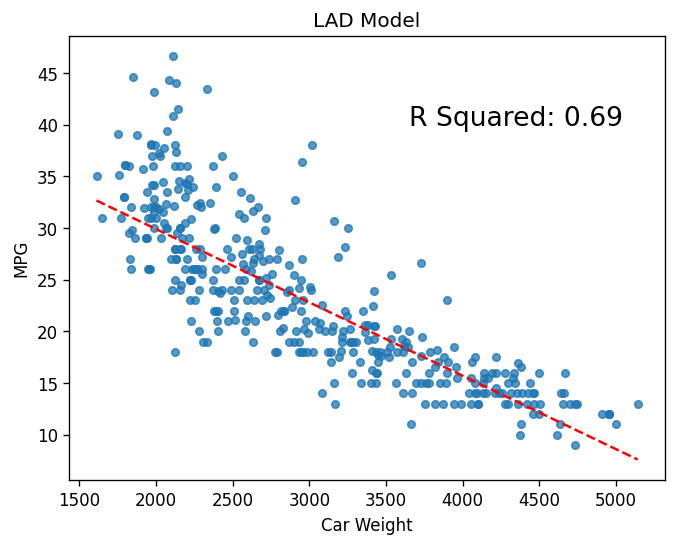

In [ ]:
# Same as above
y = car_data.MPG.values
weight = car_data.weight.values
N = weight.size
X = np.c_[np.ones(N), weight]
betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)
print(betas)

weight_grid = np.arange(weight.min(), weight.max()+1)
Xn = np.c_[np.ones(weight_grid.size), weight_grid]
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
car_data.plot.scatter(x='weight', y='MPG', alpha=0.75, ax=ax)
ax.set_xlabel('Car Weight')
ax.set_ylabel('MPG')

ax.plot(weight_grid, yn, color = 'red', linestyle = '--')
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)),
            xy=(0.75, 0.8),
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('LAD Model')

# Display the image
plt.show()

Written answer: The LAD fit does not give as much weight to the outliers as the OLS fit. The $R^2$ value is identical, however. One would normally expect OLS to be slightly higher than LAD due to the optimization function being optimized.

### Question 2.3:

Now we will use all data for the fit. Fit an LAD model to the car data (excluding the name) with the `linear_model` module from the `sklearn` package by using the [`QuantileRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.QuantileRegressor.html#sklearn.linear_model.QuantileRegressor) class that implements a [pinball loss](https://en.wikipedia.org/wiki/Quantile_regression), a more general case of the [`mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html) loss. To get an MAD regression, set the parameters `alpha=0` and `quantile=0.5` in the `QuantileRegressor` call.

In no more than two sentences, comment on the $R^2$ values for both the OLS and MAD regressions. Use the `sklearn` models for this analysis. Are they similar? Make a scatterplot of the sklearn's OLS and MAD predictions.

MAD R-Squared: 0.69


Text(0.5, 1.0, 'OLS vs MAD Predictions')

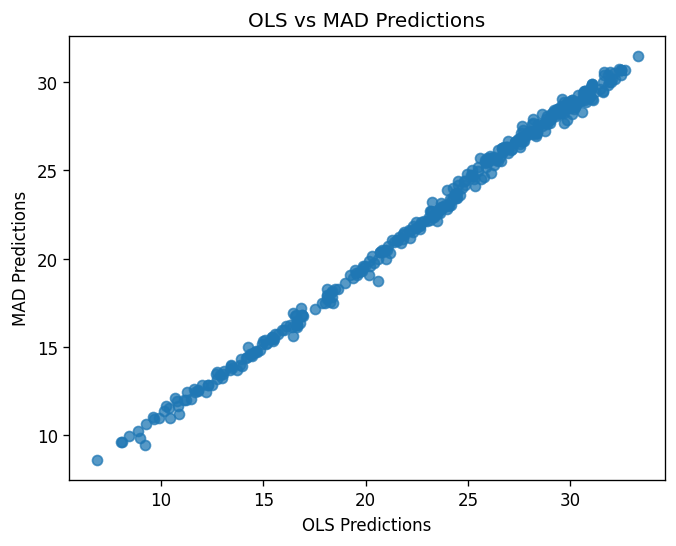

In [ ]:
# Here, I am showing my models a dataframe.
y = car_data.MPG.values
X = car_data.iloc[:, 1:6]
MAD_fit = linear_model.QuantileRegressor(quantile=0.5, alpha=0).fit(X, y)

# Get the R2
print(f'MAD R-Squared: {MAD_fit.score(X,y):.2f}')

# Compute predictions with the new data and estimated coefficients
y_mad = MAD_fit.predict(X)

# If they did only with weight as predictor mark this Incorrect. Same if they add a column of ones before fitting the QuantileRegressor() as the function add the column of ones by default.

# Get scatterplot of the OLS and MAD predictions
fig, ax = plt.subplots(dpi = 120)
plt.scatter(y_ols, y_mad, alpha=0.75)
ax.set_xlabel('OLS Predictions')
ax.set_ylabel('MAD Predictions')
ax.set_title('OLS vs MAD Predictions')


Written answer: The $R^2$ now is 0.69, as expected, slightly lower than the OLS estimate of 0.71. Regarding the scatterplot between the OLS and the MAD model, we see some small differences. The MAD model is less sensitive to outliers, so it does not penalize extreme errors as strongly as the OLS regression.